In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('comprehensive_mutual_funds_data.csv',na_values='-')
data.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.10,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.90,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7


In [4]:
#replacing values
data['risk_level'].replace({1:'low',2:'Moderately Low',3:'Moderat',4:'Moderately High',5:'High',6:'Very High'},inplace=True)
data.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,Moderat,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.10,low,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,High,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.90,Very High,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,Very High,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7


In [5]:
data.shape

(814, 20)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   fund_manager   814 non-null    object 
 7   sortino        791 non-null    float64
 8   alpha          772 non-null    float64
 9   sd             790 non-null    float64
 10  beta           772 non-null    float64
 11  sharpe         791 non-null    float64
 12  risk_level     814 non-null    object 
 13  amc_name       814 non-null    object 
 14  rating         814 non-null    int64  
 15  category       814 non-null    object 
 16  sub_category   814 non-null    object 
 17  returns_1yr    814 non-null    float64
 18  returns_3y

In [7]:
data.duplicated().any()

False

In [8]:
data.isna().sum()

scheme_name        0
min_sip            0
min_lumpsum        0
expense_ratio      0
fund_size_cr       0
fund_age_yr        0
fund_manager       0
sortino           23
alpha             42
sd                24
beta              42
sharpe            23
risk_level         0
amc_name           0
rating             0
category           0
sub_category       0
returns_1yr        0
returns_3yr       21
returns_5yr      167
dtype: int64

In [9]:
# Lets investigate why there are missing values in returns_3yr and returns_5yr
data[data['returns_3yr'].isnull()]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
61,AXIS Floater Fund,1000,5000,0.16,416.0,2,Aditya Pagaria,NaN,NaN,NaN,NaN,NaN,Moderately Low,Axis Mutual Fund,2,Debt,Floater Mutual Funds,5.8,NaN,NaN
104,Baroda BNP Paribas Banking & PSU Bond Fund,500,5000,0.39,40.0,2,Prashant Pimple,NaN,NaN,NaN,NaN,NaN,Moderately Low,Baroda BNP Paribas Mutual Fund,2,Debt,Banking and PSU Mutual Funds,2.5,NaN,NaN
125,BHARAT Bond FOF – April 2025 – Direct Growth,500,1000,0.06,3912.0,3,Dhawal Dalal,NaN,NaN,NaN,NaN,NaN,Moderately Low,Edelweiss Mutual Fund,2,Other,FoFs Domestic,2.6,NaN,NaN
154,DSP Floater Fund,500,500,0.24,983.0,2,Kedar Karnik,NaN,NaN,NaN,NaN,NaN,Moderately Low,DSP Mutual Fund,1,Debt,Floater Mutual Funds,4.4,NaN,NaN
398,Invesco India Medium Duration Fund,1000,1000,0.40,306.0,2,Vikas Garg,NaN,NaN,NaN,NaN,NaN,Moderat,Invesco Mutual Fund,2,Debt,Medium Duration Funds,3.5,NaN,NaN
411,ITI Banking & PSU Debt Fund,500,5000,0.15,27.0,2,Vikrant Mehta,NaN,NaN,NaN,NaN,NaN,Moderately Low,ITI Mutual Fund,5,Debt,Banking and PSU Mutual Funds,5.4,NaN,NaN
412,ITI Dynamic Bond Fund,500,5000,0.14,57.0,2,Vikrant Mehta,NaN,NaN,NaN,NaN,NaN,Moderately Low,ITI Mutual Fund,5,Debt,Dynamic Bond,5.7,NaN,NaN
417,ITI Ultra Short Duration Fund,500,5000,0.10,119.0,2,Vikrant Mehta,NaN,NaN,NaN,NaN,NaN,Moderately Low,ITI Mutual Fund,2,Debt,Ultra Short Duration Funds,5.3,NaN,NaN
495,Mahindra Manulife Short Duration Fund,500,1000,0.29,43.0,2,Rahul Pal,NaN,NaN,NaN,NaN,NaN,Moderat,Mahindra Manulife Mutual Fund,3,Debt,Short Duration Funds,4.4,NaN,NaN
497,Mirae Asset Banking and PSU Debt Fund,1000,5000,0.34,89.0,3,Basant Bafna,NaN,NaN,NaN,NaN,NaN,Moderately Low,Mirae Asset Mutual Fund,3,Debt,Banking and PSU Mutual Funds,3.7,NaN,NaN


In [11]:
data[data['returns_5yr'].isnull()]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.90,Very High,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
38,Aditya Birla SL Overnight Fund,0,5000,0.07,13399.0,4,Kaustubh Gupta,0.11,0.58,0.35,0.43,0.02,low,Aditya Birla Sun Life Mutual Fund,3,Debt,Overnight Mutual Funds,5.4,3.9,NaN
41,Aditya Birla SL Retirement-The 30s Plan-Dir Gr...,500,1000,1.06,258.0,4,Dhaval Shah,2.41,-5.61,14.94,0.84,0.94,Very High,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Retirement Funds,0.0,17.9,NaN
42,Aditya Birla SL Retirement-The 40s Plan-Dir Gr...,500,1000,1.07,91.0,4,Dhaval Shah,2.34,-3.14,11.86,0.77,0.93,Very High,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Retirement Funds,-0.1,15.0,NaN
43,Aditya Birla SL Retirement-The 50s Plan-Dir Gr...,500,1000,0.63,27.0,4,Dhaval Shah,0.29,-2.04,2.99,0.34,0.13,Moderately High,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Retirement Funds,3.0,4.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,UTI-Equity Savings Fund,0,5000,0.68,257.0,5,V Srivatsa,4.06,3.98,5.99,0.91,1.75,Moderat,UTI Mutual Fund,4,Hybrid,Equity Savings Mutual Funds,6.1,14.7,NaN
786,UTI-Floater Fund,500,500,0.35,1637.0,4,Sudhir Agrawal,3.07,3.41,1.05,1.41,1.45,Moderately Low,UTI Mutual Fund,3,Debt,Floater Mutual Funds,5.1,5.9,NaN
801,UTI-Nifty Next 50 Index Fund,0,5000,0.33,1926.0,5,Sharwan Kumar Goyal,1.71,-4.62,18.16,0.99,0.97,Very High,UTI Mutual Fund,2,Other,Index Funds,-6.4,22.2,NaN
811,WhiteOak Capital Liquid Fund,500,500,0.26,197.0,4,Piyush Baranwal,-0.42,0.93,0.39,0.72,-0.07,low,WhiteOak Capital Mutual Fund,1,Debt,Liquid Mutual Funds,5.3,3.8,NaN


In [12]:
# mean returns across category
mean_returns_by_category = data.groupby('category')['returns_3yr','returns_5yr'].mean()
mean_returns_by_category

<ipython-input-12-3e852e121d00>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_returns_by_category = data.groupby('category')['returns_3yr','returns_5yr'].mean()


,returns_3yr,returns_5yr
category,,
Debt,6.228517,6.385446
Equity,29.738111,12.069767
Hybrid,15.272414,8.581053
Other,20.792405,10.710938
Solution Oriented,18.167857,9.747059


In [13]:
# mean performance ratios across category
mean_ratios_by_category = data.groupby('category')['sortino','alpha','sd','beta','sharpe'].mean()
mean_ratios_by_category

<ipython-input-13-c945dd9c370f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_ratios_by_category = data.groupby('category')['sortino','alpha','sd','beta','sharpe'].mean()


,sortino,alpha,sd,beta,sharpe
category,,,,,
Debt,2.139885,2.160000,2.092107,0.807214,0.892366
Equity,3.110392,3.402550,16.959477,0.878642,1.459837
Hybrid,2.776552,2.486034,7.493190,0.707155,1.311638
Other,2.420633,0.513594,15.480506,0.850938,1.090253
Solution Oriented,2.589286,0.700357,10.272143,0.765714,1.204286


In [14]:
# imputing missing values with mean of category
data['returns_3yr'] = data.groupby('category')['returns_3yr'].apply(lambda x: x.fillna(x.mean()))
data['returns_5yr'] = data.groupby('category')['returns_5yr'].apply(lambda x: x.fillna(x.mean()))
data['sortino'] = data.groupby('category')['sortino'].apply(lambda x: x.fillna(x.mean()))
data['alpha'] = data.groupby('category')['alpha'].apply(lambda x: x.fillna(x.mean()))
data['sd'] = data.groupby('category')['sd'].apply(lambda x: x.fillna(x.mean()))
data['beta'] = data.groupby('category')['beta'].apply(lambda x: x.fillna(x.mean()))
data['sharpe'] = data.groupby('category')['sharpe'].apply(lambda x: x.fillna(x.mean()))

<ipython-input-14-5ab28df2dfd7>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data['returns_3yr'] = data.groupby('category')['returns_3yr'].apply(lambda x: x.fillna(x.mean()))
<ipython-input-14-5ab28df2dfd7>:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data['returns_5yr'] = data.groupby('

In [15]:
# verifying missing values are imputed
data.isnull().sum()

scheme_name      0
min_sip          0
min_lumpsum      0
expense_ratio    0
fund_size_cr     0
fund_age_yr      0
fund_manager     0
sortino          0
alpha            0
sd               0
beta             0
sharpe           0
risk_level       0
amc_name         0
rating           0
category         0
sub_category     0
returns_1yr      0
returns_3yr      0
returns_5yr      0
dtype: int64

In [16]:
# checking statistics of numerical columns
data.describe()

,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,sortino,alpha,sd,beta,sharpe,rating,returns_1yr,returns_3yr,returns_5yr
count,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000
mean,528.500000,3047.468059,0.713231,3812.854214,8.319410,2.640883,2.464598,10.084476,0.822852,1.197011,2.641278,3.921376,18.254880,9.389900
std,369.184517,2514.619513,0.482161,7181.479475,2.640622,1.374909,3.859215,7.808093,1.275605,0.531163,1.463476,6.675502,12.101639,3.497044
min,0.000000,0.000000,0.000000,2.380000,1.000000,-1.770000,-13.360000,0.270000,-31.860000,-0.820000,0.000000,-19.700000,3.300000,-4.100000
25%,150.000000,500.000000,0.310000,175.250000,6.000000,1.810000,0.513594,2.092107,0.710000,0.894275,2.000000,1.500000,6.228517,6.389085
50%,500.000000,5000.000000,0.615000,940.500000,10.000000,2.825000,1.885000,11.870000,0.850938,1.290000,3.000000,4.400000,18.050000,8.800000
75%,1000.000000,5000.000000,1.030000,3819.000000,10.000000,3.460000,3.727500,16.410000,0.960000,1.540000,4.000000,5.600000,27.000000,12.069767
max,2000.000000,25000.000000,2.590000,57052.000000,17.000000,12.570000,27.240000,77.720000,5.400000,3.520000,5.000000,130.800000,71.400000,23.200000


In [17]:
data.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,Moderat,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.900000
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.10,low,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.500000
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,High,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.700000
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.90,Very High,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,9.747059
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,Very High,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.700000


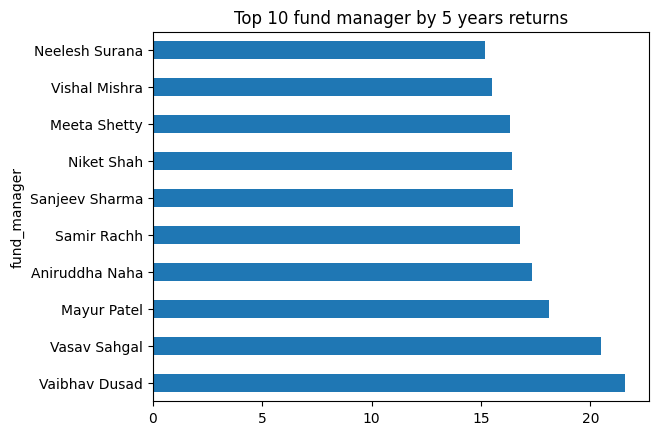

In [18]:
# fund manager with highest returns in 5 years
data.groupby('fund_manager')['returns_5yr'].mean().sort_values(ascending=False).nlargest(10).plot(kind='barh')
plt.title('Top 10 fund manager by 5 years returns')
plt.show()

In [19]:
# creating category wise dataframes

debt_data = data[data['category'] == 'Debt']
equity_data = data[data['category'] == 'Equity']
hybrid_data = data[data['category'] == 'Hybrid']
other_data = data[data['category'] == 'Other']
solution_data = data[data['category'] == 'Solution Oriented']

In [20]:
# calculating top 5 fund manager with avg highest returns in each category

top_5_debt = debt_data.groupby('fund_manager')['returns_5yr'].mean().sort_values(ascending=False).head().reset_index()
top_5_equity = equity_data.groupby('fund_manager')['returns_5yr'].mean().sort_values(ascending=False).head().reset_index()
top_5_hybrid = hybrid_data.groupby('fund_manager')['returns_5yr'].mean().sort_values(ascending=False).head().reset_index()
top_5_solution = solution_data.groupby('fund_manager')['returns_5yr'].mean().sort_values(ascending=False).head().reset_index()
top_5_other = other_data.groupby('fund_manager')['returns_5yr'].mean().sort_values(ascending=False).head().reset_index()

<Axes: xlabel='fund_manager', ylabel='returns_5yr'>

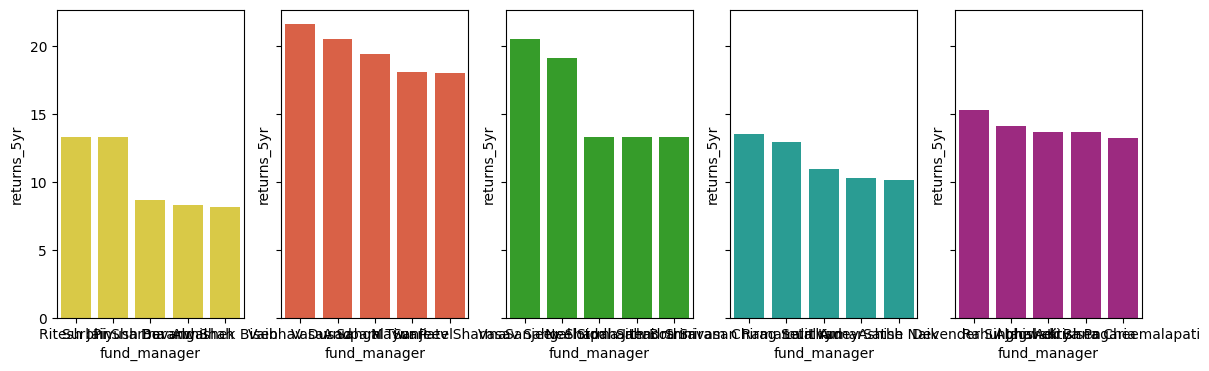

In [21]:
# create the plot
fig, ax = plt.subplots(nrows=1,ncols=5,figsize=(14, 4),sharey='row')
sns.barplot(x='fund_manager', y='returns_5yr', data=top_5_debt, ax=ax[0],color='#F1DC2F')
sns.barplot(x='fund_manager', y='returns_5yr', data=top_5_equity, ax=ax[1],color='#F1512F')
sns.barplot(x='fund_manager', y='returns_5yr', data=top_5_hybrid, ax=ax[2],color='#27AF17')
sns.barplot(x='fund_manager', y='returns_5yr', data=top_5_solution, ax=ax[3],color='#17AFA3')
sns.barplot(x='fund_manager', y='returns_5yr', data=top_5_other, ax=ax[4],color='#AF178A')

In [22]:
# set plot title and x labels
ax[0].set_title('Debt Funds Returns')
ax[0].set_xticklabels(top_5_debt['fund_manager'],rotation='vertical')
ax[1].set_title('Equity Funds Returns')
ax[1].set_xticklabels(top_5_equity['fund_manager'],rotation='vertical')
ax[2].set_title('Hybrid Funds Returns')
ax[2].set_xticklabels(top_5_hybrid['fund_manager'],rotation='vertical')
ax[3].set_title('Solution Funds Returns')
ax[3].set_xticklabels(top_5_solution['fund_manager'],rotation='vertical')
ax[4].set_title('Other Funds Returns')
ax[4].set_xticklabels(top_5_other['fund_manager'],rotation='vertical')

[Text(0, 0, 'Devender Singhal'),
 Text(1, 0, 'Rahul Jagwani'),
 Text(2, 0, 'Abhishek Bisen'),
 Text(3, 0, 'Aditya Pagaria'),
 Text(4, 0, 'Krishna Cheemalapati')]

In [18]:
data.columns

Index(['scheme_name', 'min_sip', 'min_lumpsum', 'expense_ratio',
       'fund_size_cr', 'fund_age_yr', 'fund_manager', 'sortino', 'alpha', 'sd',
       'beta', 'sharpe', 'risk_level', 'amc_name', 'rating', 'category',
       'sub_category', 'returns_1yr', 'returns_3yr', 'returns_5yr'],
      dtype='object')